# Furniture E-commerce Customer Churn Prediction - Data Exploration
# Project: furniture-ecommerce-churn-prediction-dashboard
# Author: Hansel Liebrata
# File: notebooks/01_data_exploration.ipynb

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("E-COMMERCE CUSTOMER CHURN PREDICTION")
print("=" * 60)
print("Phase 1: Exploratory Data Analysis")
print("=" * 60)

E-COMMERCE CUSTOMER CHURN PREDICTION
Phase 1: Exploratory Data Analysis


# ================================================================
# 1. DATA LOADING AND INITIAL INSPECTION
# ================================================================

In [6]:
def load_and_inspect_data():
    """Load and inspect the e-commerce user churn dataset"""
    print("\nDATA LOADING AND INSPECTION")
    print("-" * 40)
    
    file_path = '../data/raw/ecom-user-churn-data.csv'
    
    # Load the dataset
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully: {df.shape[0]:,} rows × {df.shape[1]} columns")
        
        # Data dictionary
        feature_descriptions = {
            'visitorid': 'Unique identifier for each visitor',
            'ses_rec': 'Recency of the last session',
            'ses_rec_avg': 'Average session recency',
            'ses_rec_sd': 'Standard deviation of session recency',
            'ses_rec_cv': 'Coefficient of variation of session recency',
            'user_rec': 'User recency',
            'ses_n': 'Number of sessions',
            'ses_n_r': 'Session count ratio',
            'int_n': 'Number of interactions',
            'int_n_r': 'Interaction ratio',
            'tran_n': 'Number of transactions',
            'tran_n_r': 'Transaction ratio',
            'rev_sum': 'Total revenue',
            'rev_sum_r': 'Revenue ratio',
            'major_spend_r': 'Major spending ratio',
            'int_cat_n_avg': 'Average number of interaction categories',
            'int_itm_n_avg': 'Average number of interaction items',
            'ses_mo_avg': 'Average session month',
            'ses_mo_sd': 'Standard deviation of session month',
            'ses_ho_avg': 'Average session hour',
            'ses_ho_sd': 'Standard deviation of session hour',
            'ses_wknd_r': 'Weekend session ratio',
            'ses_len_avg': 'Average session length',
            'time_to_int': 'Time to interaction',
            'time_to_tran': 'Time to transaction',
            'target_class': 'Churn status (1: churned, 0: active)'
        }
        
        # Basic information
        print(f"\n1. Dataset Overview:")
        print(f"Total visitors: {df['visitorid'].nunique():,}")
        print(f"Features: {df.shape[1]}")
        print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        
        # Data types and missing values
        print(f"\n2. Data Structure:")
        for col in df.columns:
            missing = df[col].isnull().sum()
            dtype = df[col].dtype
            unique = df[col].nunique()
            
            desc = feature_descriptions.get(col, "Category interaction count" if "int_cat" in col else "")
            print(f"\n{col}:")
            print(f"  Description: {desc}")
            print(f"  Type: {dtype}")
            print(f"  Unique Values: {unique:,}")
            print(f"  Missing: {missing:,} ({missing/len(df)*100:.1f}%)")
            
            # Show value distribution for categorical or binary features
            if df[col].dtype in ['object', 'bool'] or df[col].nunique() < 5:
                print("  Value distribution:")
                print(df[col].value_counts(normalize=True).round(3) * 100)
        
        # Basic statistics for numerical columns
        print(f"\n3. Numerical Features Summary:")
        numerical_summary = df.describe().round(2)
        print(numerical_summary)
        
        # Churn rate
        churn_rate = df['target_class'].mean()
        print(f"\n4. Churn Analysis:")
        print(f"Overall churn rate: {churn_rate:.1%}")
        
        return df
    
    except FileNotFoundError:
        print(f"Error: Dataset file not found at {file_path}")
        return None

# Load the dataset
df = load_and_inspect_data()


DATA LOADING AND INSPECTION
----------------------------------------
Dataset loaded successfully: 49,358 rows × 49 columns

1. Dataset Overview:
Total visitors: 49,358
Features: 49
Memory usage: 18.5 MB

2. Data Structure:

visitorid:
  Description: Unique identifier for each visitor
  Type: int64
  Unique Values: 49,358
  Missing: 0 (0.0%)

ses_rec:
  Description: Recency of the last session
  Type: float64
  Unique Values: 32
  Missing: 0 (0.0%)

ses_rec_avg:
  Description: Average session recency
  Type: float64
  Unique Values: 1,117
  Missing: 0 (0.0%)

ses_rec_sd:
  Description: Standard deviation of session recency
  Type: float64
  Unique Values: 4,234
  Missing: 0 (0.0%)

ses_rec_cv:
  Description: Coefficient of variation of session recency
  Type: float64
  Unique Values: 5,311
  Missing: 0 (0.0%)

user_rec:
  Description: User recency
  Type: float64
  Unique Values: 100
  Missing: 0 (0.0%)

ses_n:
  Description: Number of sessions
  Type: float64
  Unique Values: 125
  Mi


USER BEHAVIOR ANALYSIS
----------------------------------------

1. Session Patterns:

Sessions per user:
count    49358.00
mean         3.37
std          7.38
min          2.00
25%          2.00
50%          2.00
75%          3.00
max        475.00
Name: ses_n, dtype: float64

Average session length:
count    49358.00
mean         1.74
std          3.52
min          0.00
25%          0.00
50%          0.11
75%          2.07
max         79.17
Name: ses_len_avg, dtype: float64

Weekend session ratio:
count    49358.00
mean         0.27
std          0.36
min          0.00
25%          0.00
50%          0.00
75%          0.50
max          1.00
Name: ses_wknd_r, dtype: float64


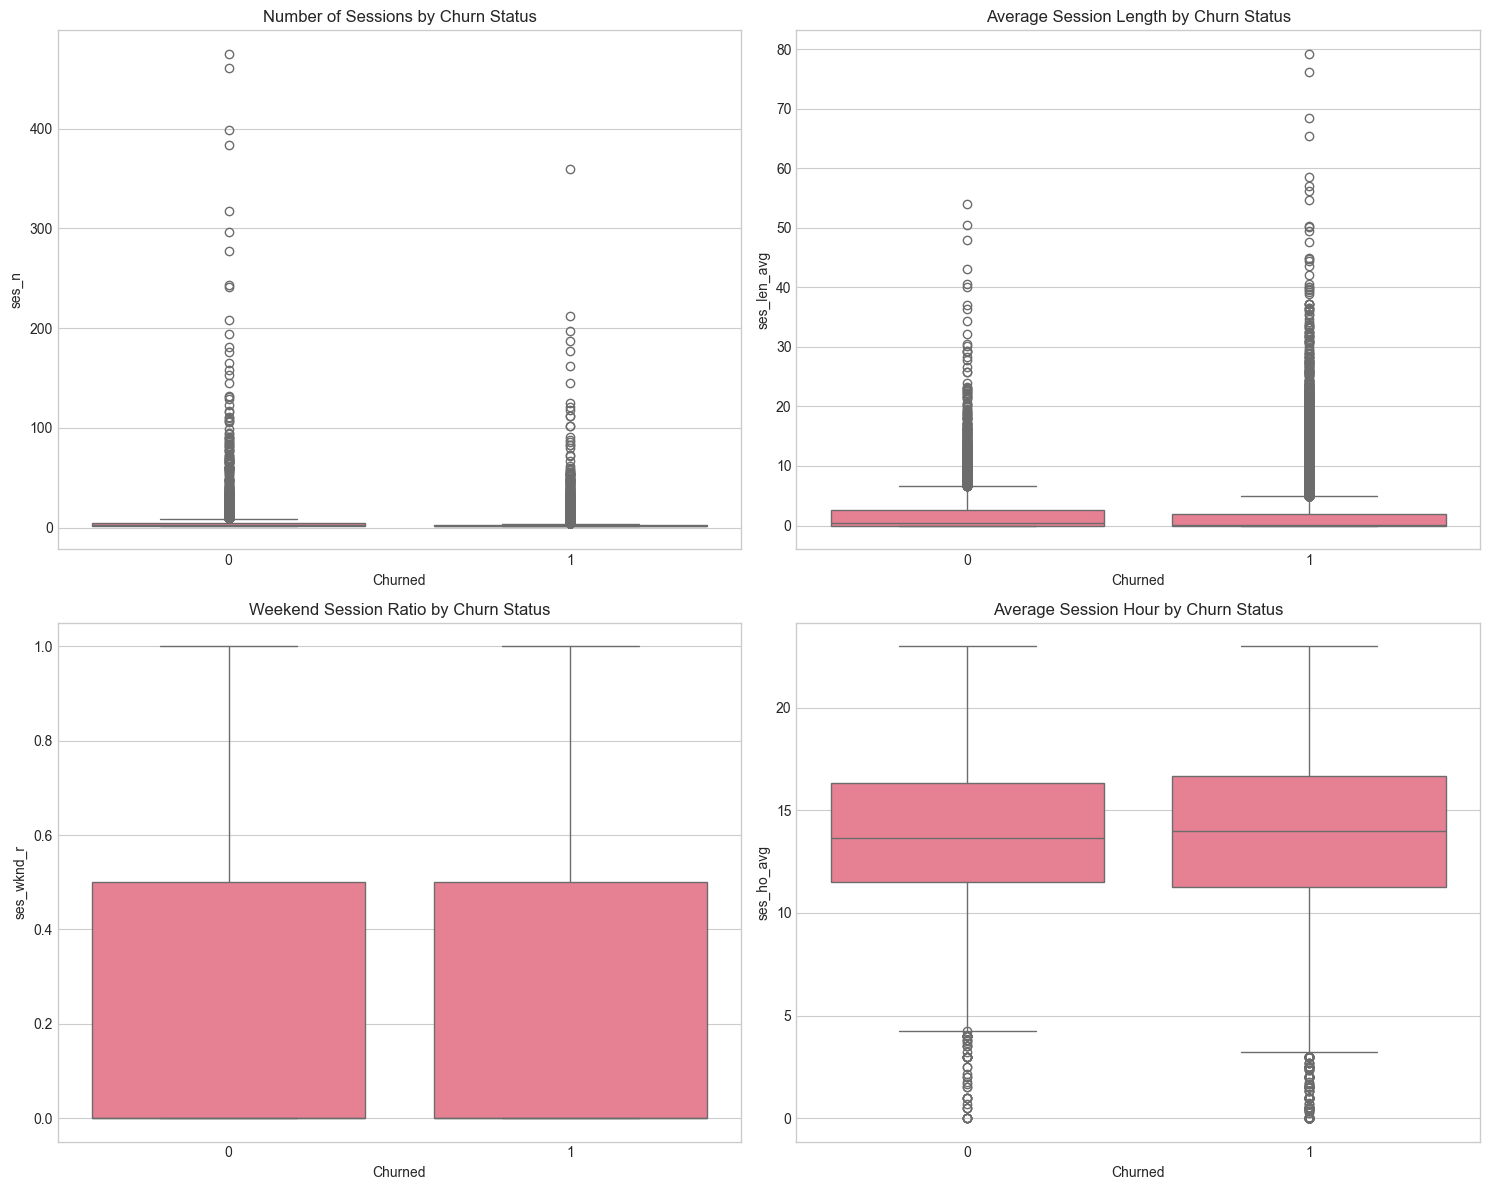


2. Interaction Patterns:

Interactions per user:
count    49358.00
mean         6.72
std         38.53
min          2.00
25%          2.00
50%          3.00
75%          6.00
max       5549.00
Name: int_n, dtype: float64

Categories per session:
count    49358.00
mean         1.02
std          0.12
min          1.00
25%          1.00
50%          1.00
75%          1.00
max          9.00
Name: int_cat_n_avg, dtype: float64

Items per session:
count    49358.00
mean         1.43
std          1.04
min          1.00
25%          1.00
50%          1.00
75%          1.50
max         56.00
Name: int_itm_n_avg, dtype: float64

Category Interaction Distribution:
int_cat22_n    103779
int_cat16_n     47176
int_cat17_n     38189
int_cat19_n     36151
int_cat20_n     24844
int_cat21_n     22064
int_cat18_n     18903
int_cat12_n      9755
int_cat2_n       8470
int_cat1_n       6795
int_cat24_n      4915
int_cat5_n       3306
int_cat3_n       2025
int_cat23_n      1882
int_cat10_n      1445
int_cat

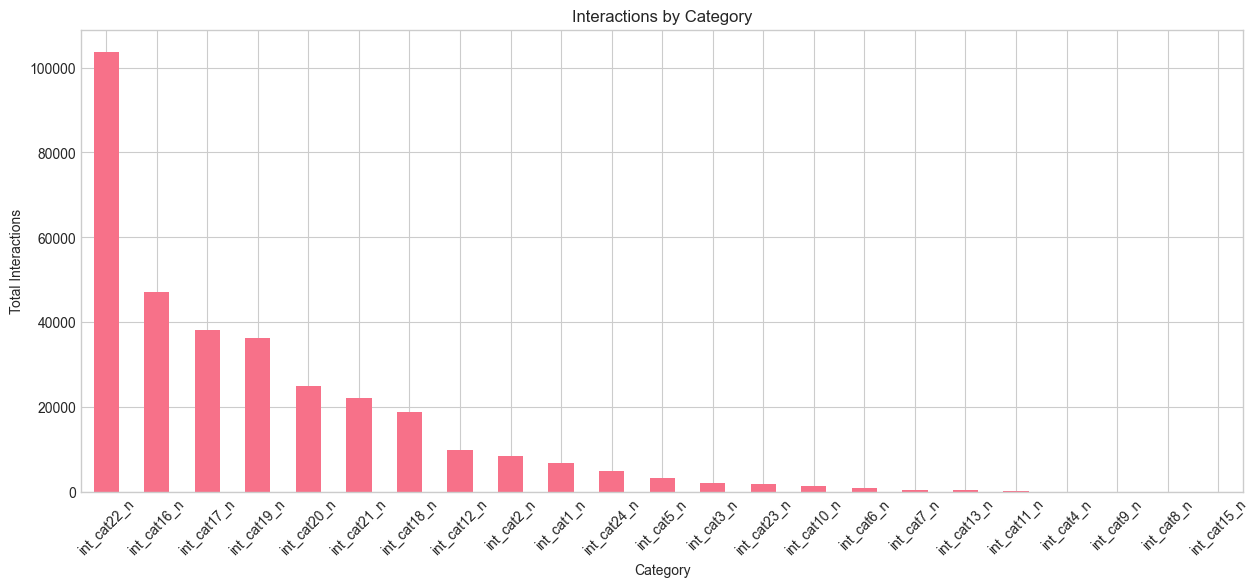


3. Transaction Patterns:

Transactions per user:
count    49358.00
mean         0.11
std          2.80
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        461.00
Name: tran_n, dtype: float64

Revenue per user:
count       49358.00
mean        11971.14
std        347566.86
min             0.00
25%             0.00
50%             0.00
75%             0.00
max      59717964.00
Name: rev_sum, dtype: float64

Time to transaction:
count    1989.00
mean       22.02
std        41.08
min         0.00
25%         6.38
50%        13.40
75%        25.30
max      1233.33
Name: time_to_tran, dtype: float64

4. User Engagement Segments:

Churn Rate by Engagement Segment:
                    count      mean
engagement_segment                 
Low                 16805  0.910979
Medium              16100  0.881925
High                16453  0.863247


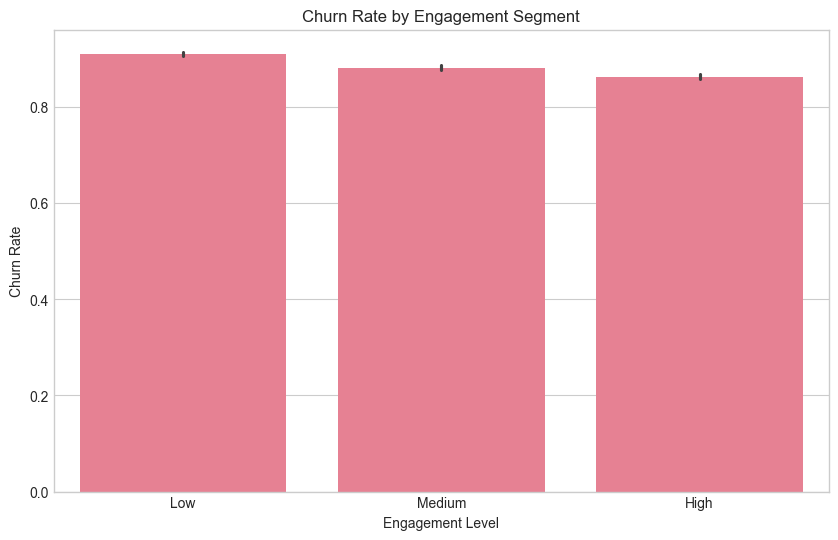

In [7]:
def analyze_user_behavior(df):
    """Analyze user behavioral patterns and their relationship with churn"""
    print("\nUSER BEHAVIOR ANALYSIS")
    print("-" * 40)
    
    # 1. Session Behavior
    print("\n1. Session Patterns:")
    session_metrics = {
        'Sessions per user': df['ses_n'].describe().round(2),
        'Average session length': df['ses_len_avg'].describe().round(2),
        'Weekend session ratio': df['ses_wknd_r'].describe().round(2)
    }
    
    for metric, stats in session_metrics.items():
        print(f"\n{metric}:")
        print(stats)
        
    # Visualize session patterns
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Sessions vs Churn
    sns.boxplot(data=df, x='target_class', y='ses_n', ax=axes[0,0])
    axes[0,0].set_title('Number of Sessions by Churn Status')
    axes[0,0].set_xlabel('Churned')
    
    # Session Length vs Churn
    sns.boxplot(data=df, x='target_class', y='ses_len_avg', ax=axes[0,1])
    axes[0,1].set_title('Average Session Length by Churn Status')
    axes[0,1].set_xlabel('Churned')
    
    # Weekend Ratio vs Churn
    sns.boxplot(data=df, x='target_class', y='ses_wknd_r', ax=axes[1,0])
    axes[1,0].set_title('Weekend Session Ratio by Churn Status')
    axes[1,0].set_xlabel('Churned')
    
    # Session Hour Distribution
    sns.boxplot(data=df, x='target_class', y='ses_ho_avg', ax=axes[1,1])
    axes[1,1].set_title('Average Session Hour by Churn Status')
    axes[1,1].set_xlabel('Churned')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Interaction Analysis
    print("\n2. Interaction Patterns:")
    interaction_metrics = {
        'Interactions per user': df['int_n'].describe().round(2),
        'Categories per session': df['int_cat_n_avg'].describe().round(2),
        'Items per session': df['int_itm_n_avg'].describe().round(2)
    }
    
    for metric, stats in interaction_metrics.items():
        print(f"\n{metric}:")
        print(stats)
    
    # Analyze category interactions
    category_cols = [col for col in df.columns if col.startswith('int_cat') and col.endswith('_n')]
    category_interactions = df[category_cols].sum().sort_values(ascending=False)
    
    print("\nCategory Interaction Distribution:")
    print(category_interactions)
    
    # Visualize category interactions
    plt.figure(figsize=(15, 6))
    category_interactions.plot(kind='bar')
    plt.title('Interactions by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Interactions')
    plt.xticks(rotation=45)
    plt.show()
    
    # 3. Transaction Behavior
    print("\n3. Transaction Patterns:")
    transaction_metrics = {
        'Transactions per user': df['tran_n'].describe().round(2),
        'Revenue per user': df['rev_sum'].describe().round(2),
        'Time to transaction': df[df['time_to_tran'] != -1]['time_to_tran'].describe().round(2)
    }
    
    for metric, stats in transaction_metrics.items():
        print(f"\n{metric}:")
        print(stats)
    
    # 4. Engagement Segments
    print("\n4. User Engagement Segments:")
    
    # Create engagement score
    df['engagement_score'] = (
        df['ses_n_r'] * 0.3 +  # Session frequency
        df['int_n_r'] * 0.3 +  # Interaction rate
        df['tran_n_r'] * 0.4   # Transaction rate
    )
    
    # Create engagement segments
    df['engagement_segment'] = pd.qcut(
        df['engagement_score'], 
        q=3, 
        labels=['Low', 'Medium', 'High']
    )
    
    # Analyze churn by engagement
    engagement_churn = df.groupby('engagement_segment')['target_class'].agg(['count', 'mean'])
    print("\nChurn Rate by Engagement Segment:")
    print(engagement_churn)
    
    # Visualize engagement vs churn
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='engagement_segment', y='target_class')
    plt.title('Churn Rate by Engagement Segment')
    plt.xlabel('Engagement Level')
    plt.ylabel('Churn Rate')
    plt.show()
    
    return {
        'session_metrics': session_metrics,
        'interaction_metrics': interaction_metrics,
        'transaction_metrics': transaction_metrics,
        'engagement_segments': engagement_churn
    }

# Analyze user behavior
behavior_analysis = analyze_user_behavior(df)


TEMPORAL PATTERN ANALYSIS
----------------------------------------

1. Session Timing Patterns:

Hour of Day Patterns:

Session Hour Statistics:
Average hour:
13.890773029121116
Hour variation:
3.3656975910126024
Most common hours:
ses_ho_avg
12.0    726
11.0    711
13.0    696
14.0    692
10.0    674
Name: count, dtype: int64


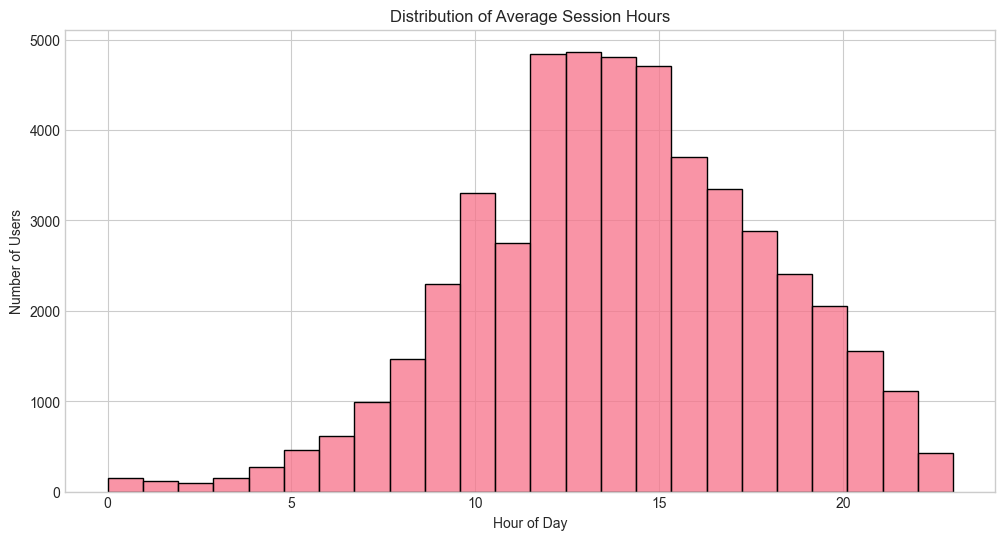


Weekend vs Weekday Patterns:

Weekend Session Ratio by Churn Status:
                count      mean       std  min  25%  50%  75%  max
target_class                                                      
0              5647.0  0.239260  0.305515  0.0  0.0  0.0  0.5  1.0
1             43711.0  0.274716  0.364346  0.0  0.0  0.0  0.5  1.0

2. Recency Patterns:

Session recency:
count    49358.000000
mean        15.454840
std          9.184645
min          0.000000
25%          7.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: ses_rec, dtype: float64

User recency:
count    49358.000000
mean        33.822947
std         25.237703
min          0.000000
25%         16.000000
50%         26.000000
75%         46.000000
max         99.000000
Name: user_rec, dtype: float64


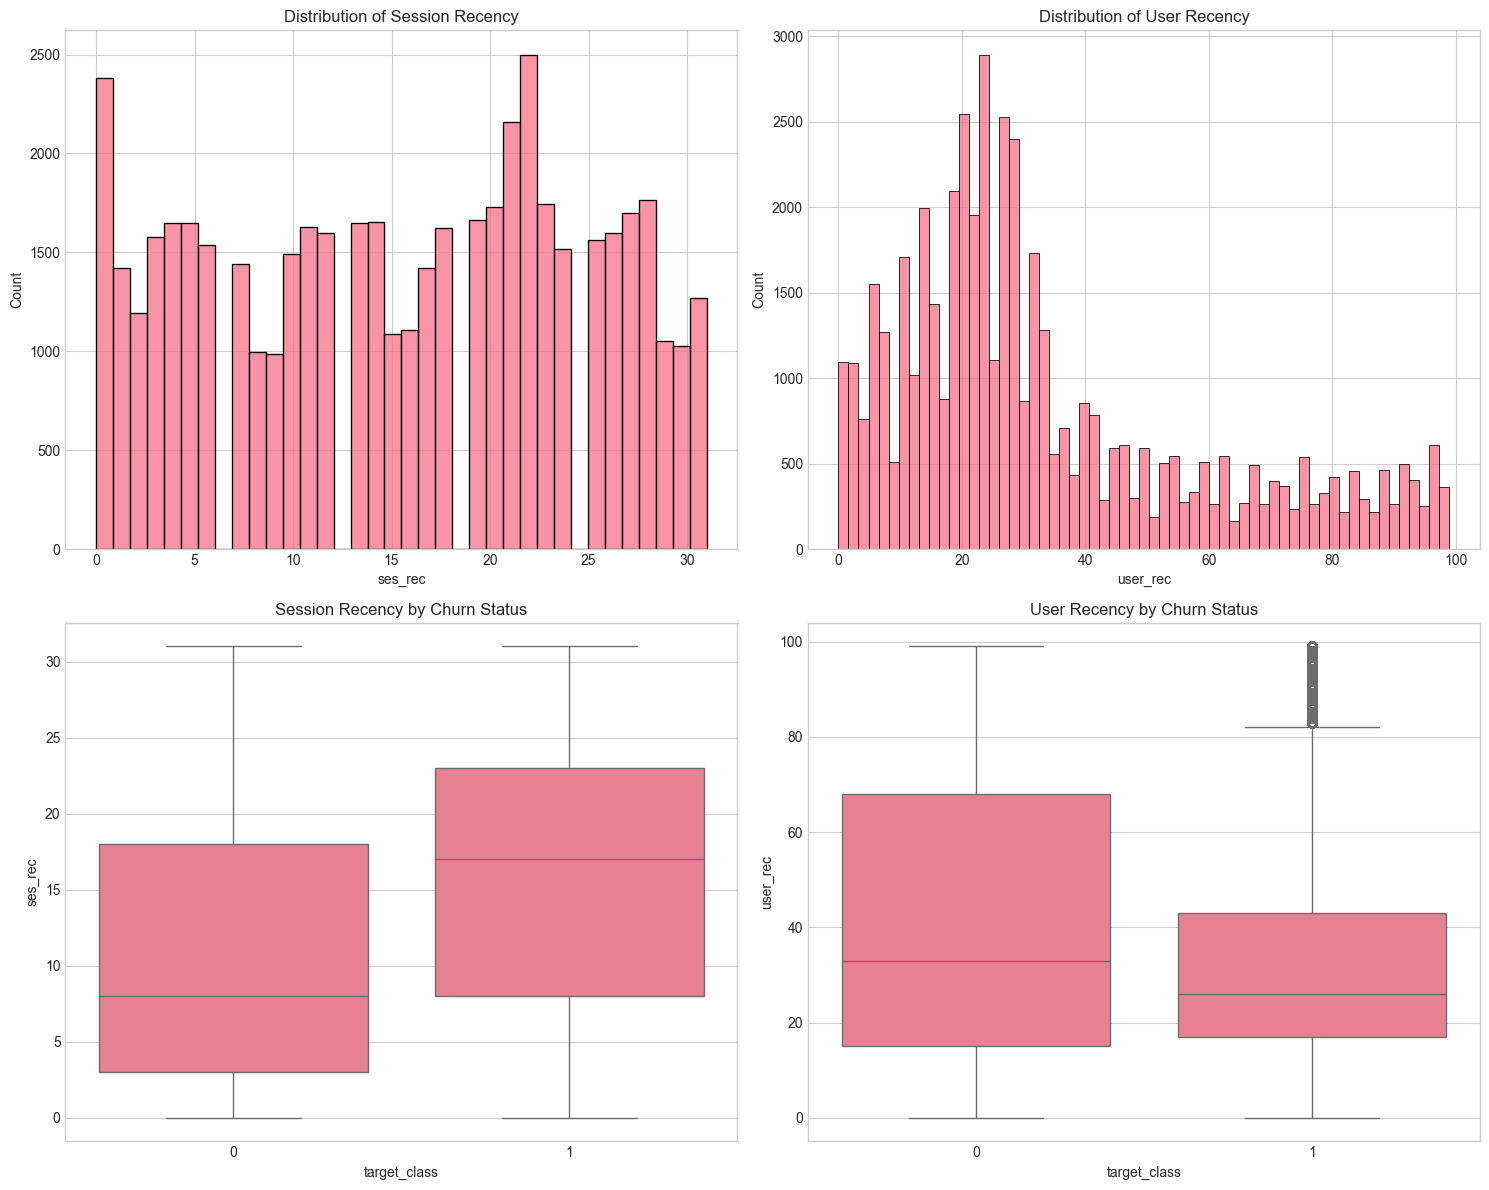


3. Activity Pattern Analysis:

Churn Rate by Activity Consistency:
                     count      mean
consistency_segment                 
Irregular            12131  0.783860
Moderate              1639  0.807200
Consistent           35588  0.923879


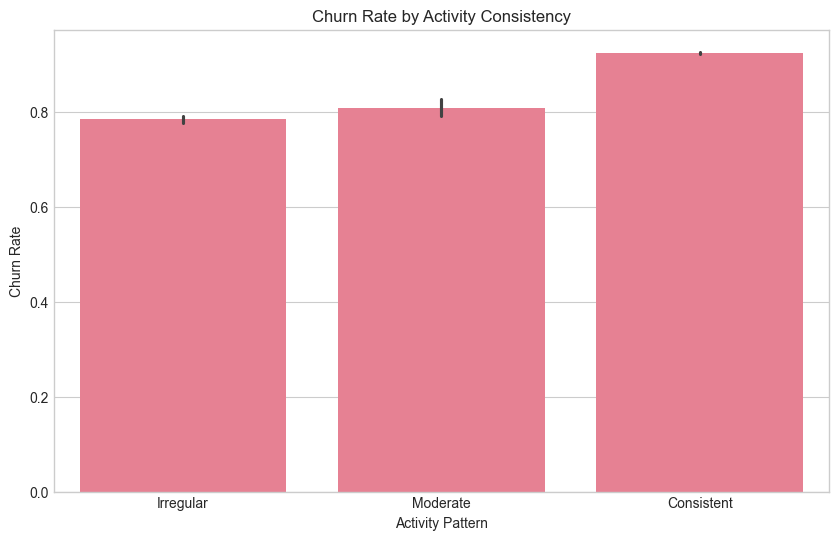


4. Session Variation Analysis:

Session Recency Coefficient of Variation:
count    49358.000000
mean        -0.020100
std          0.917701
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.638646
max         11.525121
Name: ses_rec_cv, dtype: float64

Churn Rate by Session Variation Level:
                 count      mean
variation_level                 
Low              36412  0.921564
Medium           10512  0.802892
High              2434  0.704601

5. Time to Event Analysis:

Time to first interaction:
count    49358.000000
mean         0.651881
std          1.009804
min          0.000000
25%          0.000000
50%          0.073125
75%          1.006944
max          8.666667
Name: time_to_int, dtype: float64

Time to first transaction:
count    1989.000000
mean       22.017663
std        41.082974
min         0.000000
25%         6.383333
50%        13.400000
75%        25.300000
max      1233.333400
Name: time_to_tran, dtype: float64


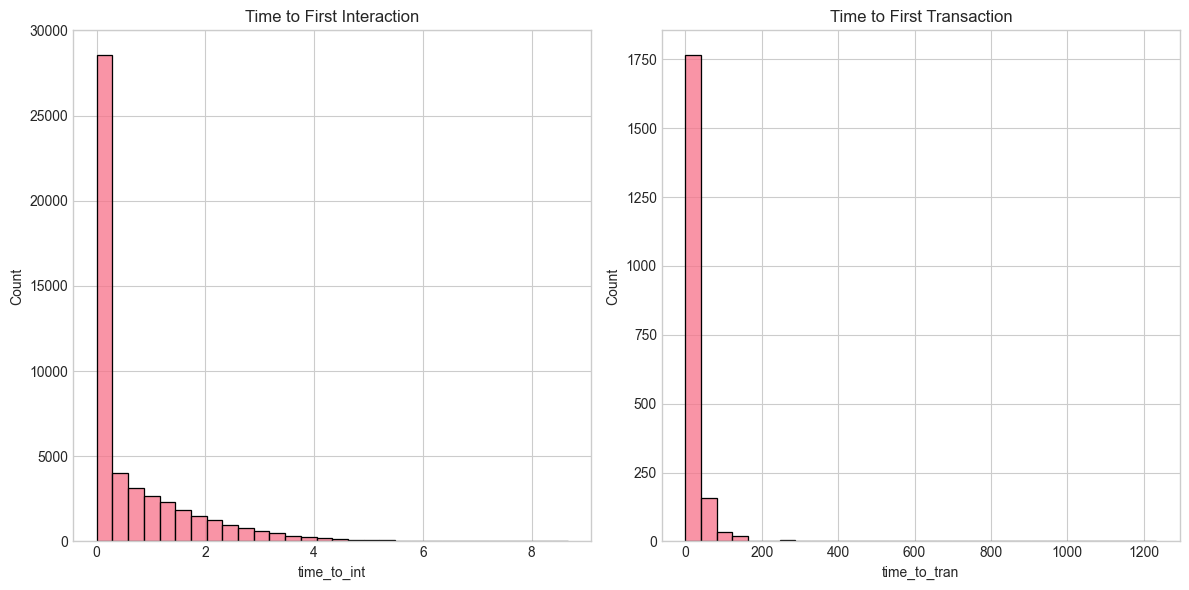

In [8]:
def analyze_temporal_patterns(df):
    """Analyze temporal patterns in user behavior"""
    print("\nTEMPORAL PATTERN ANALYSIS")
    print("-" * 40)
    
    # 1. Session Timing Analysis
    print("\n1. Session Timing Patterns:")
    
    # Hour of day patterns
    print("\nHour of Day Patterns:")
    hour_stats = {
        'Average hour': df['ses_ho_avg'].mean(),
        'Hour variation': df['ses_ho_sd'].mean(),
        'Most common hours': df[df['ses_ho_sd'] < 2]['ses_ho_avg'].value_counts().head()
    }
    print("\nSession Hour Statistics:")
    for metric, value in hour_stats.items():
        print(f"{metric}:")
        print(value)
    
    # Visualize hourly patterns
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='ses_ho_avg', bins=24)
    plt.title('Distribution of Average Session Hours')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Users')
    plt.show()
    
    # Weekend vs Weekday analysis
    print("\nWeekend vs Weekday Patterns:")
    weekend_stats = df.groupby('target_class')['ses_wknd_r'].describe()
    print("\nWeekend Session Ratio by Churn Status:")
    print(weekend_stats)
    
    # 2. Recency Analysis
    print("\n2. Recency Patterns:")
    
    recency_metrics = {
        'Session recency': df['ses_rec'].describe(),
        'User recency': df['user_rec'].describe()
    }
    
    for metric, stats in recency_metrics.items():
        print(f"\n{metric}:")
        print(stats)
    
    # Visualize recency patterns
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Session recency distribution
    sns.histplot(data=df, x='ses_rec', ax=axes[0,0])
    axes[0,0].set_title('Distribution of Session Recency')
    
    # User recency distribution
    sns.histplot(data=df, x='user_rec', ax=axes[0,1])
    axes[0,1].set_title('Distribution of User Recency')
    
    # Recency vs Churn
    sns.boxplot(data=df, x='target_class', y='ses_rec', ax=axes[1,0])
    axes[1,0].set_title('Session Recency by Churn Status')
    
    # User recency vs Churn
    sns.boxplot(data=df, x='target_class', y='user_rec', ax=axes[1,1])
    axes[1,1].set_title('User Recency by Churn Status')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Activity Patterns
    print("\n3. Activity Pattern Analysis:")
    
    # Create activity consistency score
    df['activity_consistency'] = 1 - df['ses_rec_cv'].clip(0, 1)  # Higher is more consistent
    
    # Create manual segments based on activity consistency
    df['consistency_segment'] = pd.cut(
        df['activity_consistency'],
        bins=[-float('inf'), 0.33, 0.67, float('inf')],
        labels=['Irregular', 'Moderate', 'Consistent'],
        include_lowest=True
    )
    
    consistency_churn = df.groupby('consistency_segment')['target_class'].agg(['count', 'mean'])
    print("\nChurn Rate by Activity Consistency:")
    print(consistency_churn)
    
    # Visualize activity patterns
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='consistency_segment', y='target_class')
    plt.title('Churn Rate by Activity Consistency')
    plt.xlabel('Activity Pattern')
    plt.ylabel('Churn Rate')
    plt.show()
    
    # 4. Session Variation Analysis
    print("\n4. Session Variation Analysis:")
    
    # Analyze coefficient of variation
    cv_stats = df['ses_rec_cv'].describe()
    print("\nSession Recency Coefficient of Variation:")
    print(cv_stats)
    
    # Create variation segments
    df['variation_level'] = pd.cut(
        df['ses_rec_cv'],
        bins=[-float('inf'), 0.5, 1.5, float('inf')],
        labels=['Low', 'Medium', 'High'],
        include_lowest=True
    )
    
    variation_churn = df.groupby('variation_level')['target_class'].agg(['count', 'mean'])
    print("\nChurn Rate by Session Variation Level:")
    print(variation_churn)
    
    # 5. Time to Event Analysis
    print("\n5. Time to Event Analysis:")
    
    # Filter out invalid values (-1)
    valid_interaction = df['time_to_int'] != -1
    valid_transaction = df['time_to_tran'] != -1
    
    time_metrics = {
        'Time to first interaction': df[valid_interaction]['time_to_int'].describe(),
        'Time to first transaction': df[valid_transaction]['time_to_tran'].describe()
    }
    
    for metric, stats in time_metrics.items():
        print(f"\n{metric}:")
        print(stats)
    
    # Visualize time to event distributions
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df[valid_interaction], x='time_to_int', bins=30)
    plt.title('Time to First Interaction')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=df[valid_transaction], x='time_to_tran', bins=30)
    plt.title('Time to First Transaction')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'hour_stats': hour_stats,
        'recency_metrics': recency_metrics,
        'consistency_analysis': consistency_churn,
        'variation_analysis': variation_churn,
        'time_metrics': time_metrics
    }

# Analyze temporal patterns
temporal_analysis = analyze_temporal_patterns(df)


CHURN RISK ANALYSIS
----------------------------------------

1. Engagement Metrics and Churn:

ses_n correlation with churn: -0.153

Metrics by Churn Status:
                count      mean        std  min  25%  50%  75%    max
target_class                                                         
0              5647.0  6.513193  18.203249  2.0  2.0  3.0  5.0  475.0
1             43711.0  2.959919   4.155047  2.0  2.0  2.0  3.0  360.0

int_n correlation with churn: -0.080

Metrics by Churn Status:
                count       mean        std  min  25%  50%   75%     max
target_class                                                            
0              5647.0  15.275545  97.521241  2.0  3.0  5.0  10.0  5549.0
1             43711.0   5.610510  20.907349  2.0  2.0  3.0   5.0  2017.0

tran_n correlation with churn: -0.030

Metrics by Churn Status:
                count      mean       std  min  25%  50%  75%    max
target_class                                                        
0

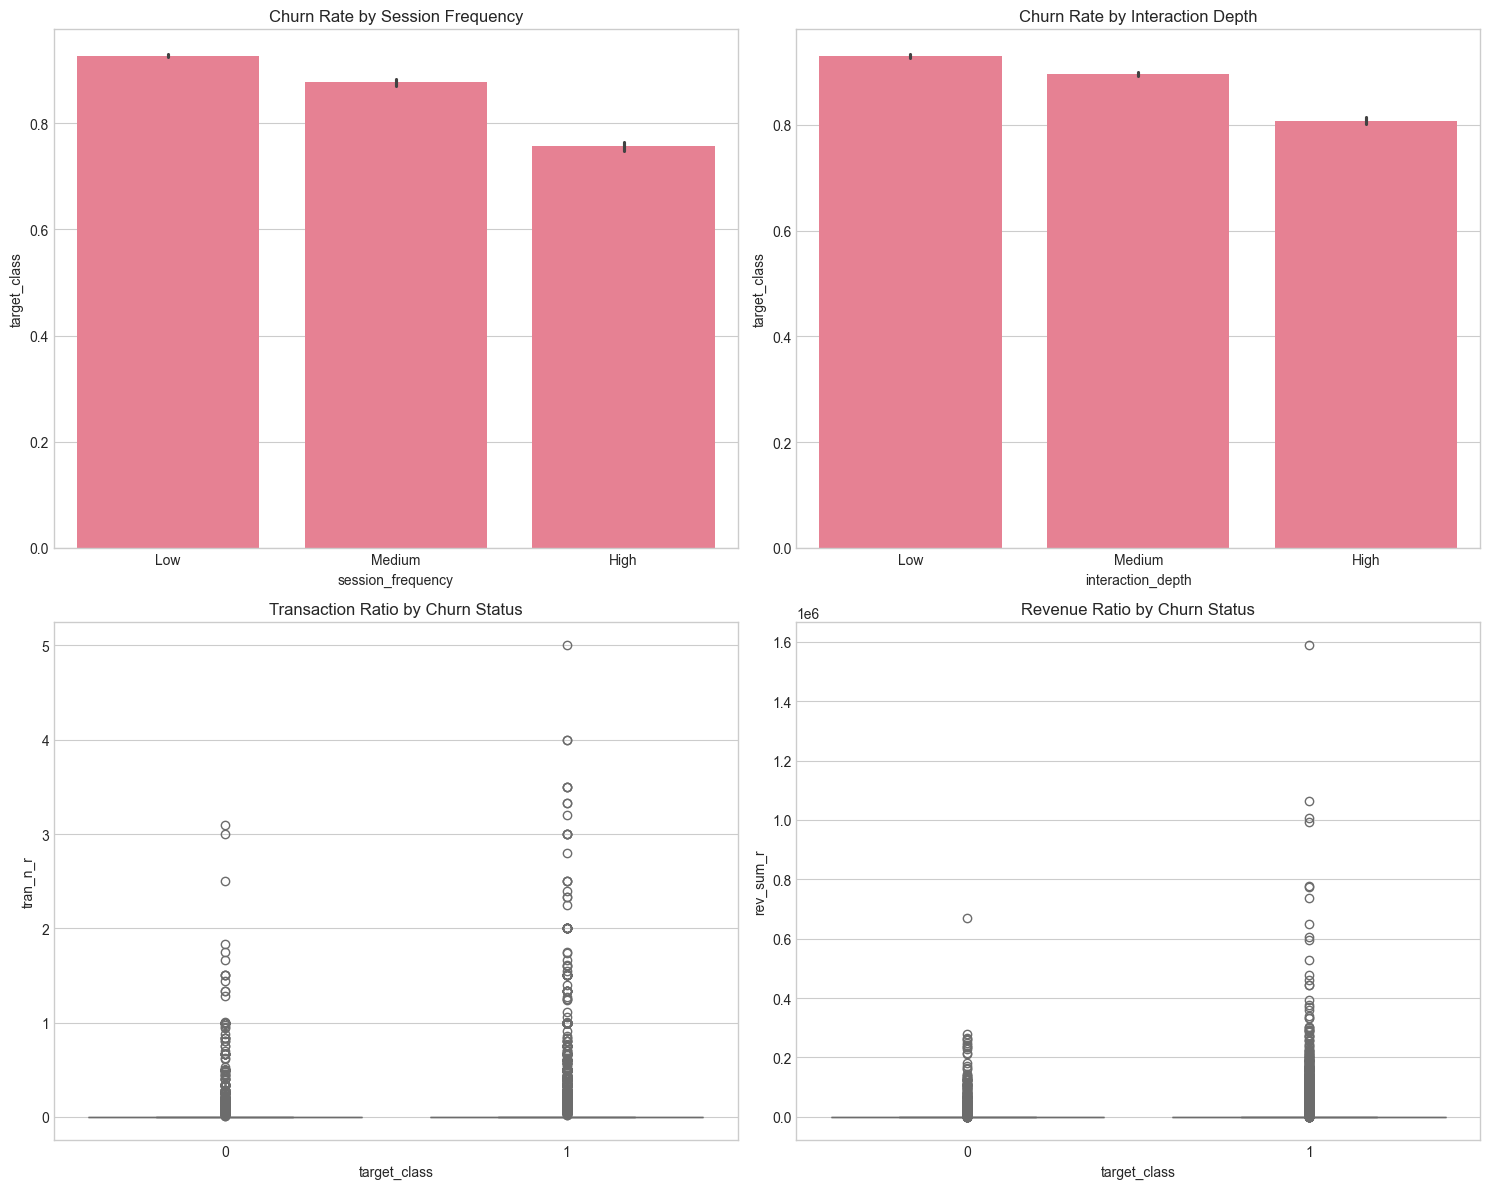


3. Recency Impact Analysis:

ses_rec correlation with churn: 0.192

user_rec correlation with churn: -0.103

ses_rec_avg correlation with churn: -0.022

4. Category Interest Analysis:

Category Correlations with Churn:
int_cat20_n   -0.073814
int_cat17_n   -0.070931
int_cat22_n   -0.065256
int_cat19_n   -0.061298
int_cat21_n   -0.056880
int_cat16_n   -0.054029
int_cat18_n   -0.046444
int_cat5_n    -0.038643
int_cat24_n   -0.037214
int_cat12_n   -0.036474
int_cat23_n   -0.033202
int_cat2_n    -0.032808
int_cat3_n    -0.030319
int_cat6_n    -0.030191
int_cat1_n    -0.025960
int_cat10_n   -0.017769
int_cat13_n   -0.015535
int_cat11_n   -0.011398
int_cat8_n    -0.010478
int_cat7_n    -0.005387
int_cat9_n    -0.004906
int_cat4_n     0.004274
int_cat15_n         NaN
dtype: float64


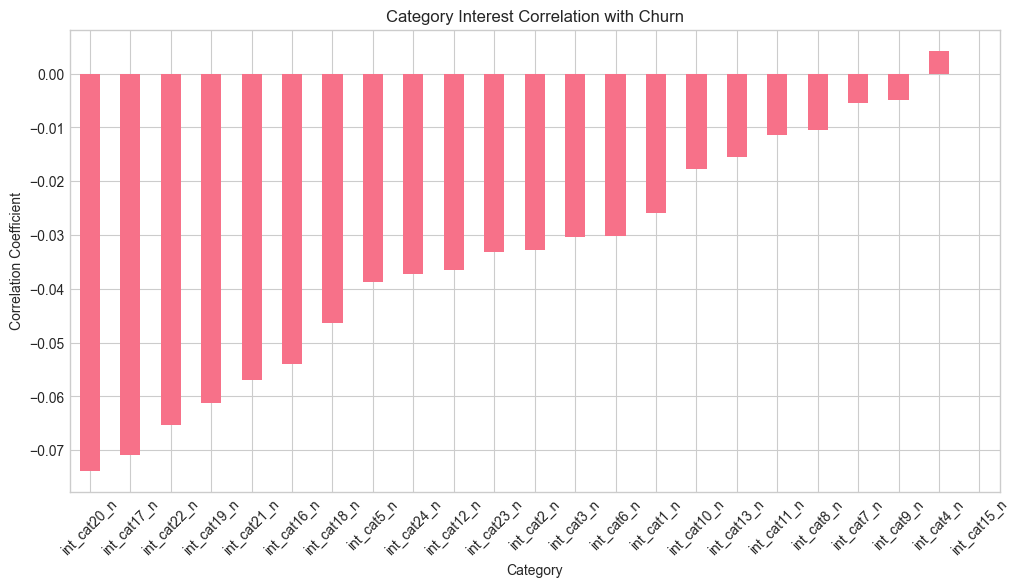


5. Risk Score Analysis:

Churn Rate by Risk Segment:
             target_class          
                    count      mean
risk_segment                       
Very Low             9878  0.779409
Low                  9928  0.866640
Medium               9812  0.908887
High                 9868  0.935651
Very High            9872  0.937703


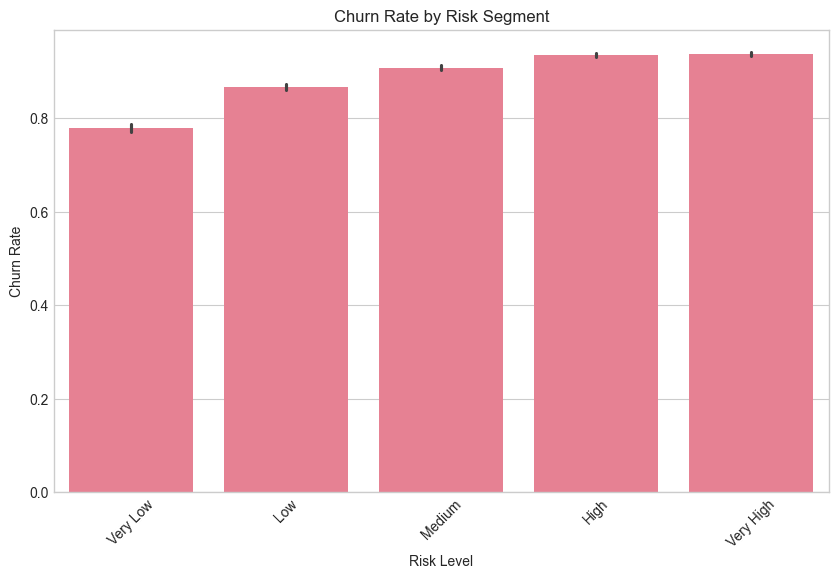

In [9]:
def analyze_churn_risk_factors(df):
    """Analyze factors contributing to customer churn"""
    print("\nCHURN RISK ANALYSIS")
    print("-" * 40)
    
    # 1. Engagement Metrics
    print("\n1. Engagement Metrics and Churn:")
    
    engagement_metrics = [
        'ses_n', 'int_n', 'tran_n', 'ses_len_avg',
        'int_cat_n_avg', 'int_itm_n_avg'
    ]
    
    for metric in engagement_metrics:
        correlation = df[metric].corr(df['target_class'])
        print(f"\n{metric} correlation with churn: {correlation:.3f}")
        
        # Calculate metrics by churn status
        metrics_by_churn = df.groupby('target_class')[metric].describe()
        print(f"\nMetrics by Churn Status:")
        print(metrics_by_churn)
    
    # 2. Behavioral Pattern Analysis
    print("\n2. Behavioral Pattern Analysis:")
    
    # Create behavioral segments using custom bins
    # Session frequency segments
    session_bins = [
        df['ses_n'].min() - 0.1,  # Start below min
        df['ses_n'].quantile(0.33),
        df['ses_n'].quantile(0.67),
        df['ses_n'].max() + 0.1  # End above max
    ]
    df['session_frequency'] = pd.cut(
        df['ses_n'],
        bins=session_bins,
        labels=['Low', 'Medium', 'High'],
        include_lowest=True
    )
    
    # Interaction depth segments
    interaction_bins = [
        df['int_n'].min() - 0.1,
        df['int_n'].quantile(0.33),
        df['int_n'].quantile(0.67),
        df['int_n'].max() + 0.1
    ]
    df['interaction_depth'] = pd.cut(
        df['int_n'],
        bins=interaction_bins,
        labels=['Low', 'Medium', 'High'],
        include_lowest=True
    )
    
    # Analyze churn by segments
    segment_churn = pd.DataFrame({
        'Session Frequency': df.groupby('session_frequency')['target_class'].mean(),
        'Interaction Depth': df.groupby('interaction_depth')['target_class'].mean()
    })
    
    print("\nChurn Rate by Behavioral Segments:")
    print(segment_churn)
    
    # Visualize behavioral patterns
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Session frequency vs Churn
    sns.barplot(data=df, x='session_frequency', y='target_class', ax=axes[0,0])
    axes[0,0].set_title('Churn Rate by Session Frequency')
    
    # Interaction depth vs Churn
    sns.barplot(data=df, x='interaction_depth', y='target_class', ax=axes[0,1])
    axes[0,1].set_title('Churn Rate by Interaction Depth')
    
    # Transaction ratio vs Churn
    sns.boxplot(data=df, x='target_class', y='tran_n_r', ax=axes[1,0])
    axes[1,0].set_title('Transaction Ratio by Churn Status')
    
    # Revenue ratio vs Churn
    sns.boxplot(data=df, x='target_class', y='rev_sum_r', ax=axes[1,1])
    axes[1,1].set_title('Revenue Ratio by Churn Status')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Recency Impact
    print("\n3. Recency Impact Analysis:")
    
    recency_metrics = ['ses_rec', 'user_rec', 'ses_rec_avg']
    
    for metric in recency_metrics:
        correlation = df[metric].corr(df['target_class'])
        print(f"\n{metric} correlation with churn: {correlation:.3f}")
    
    # 4. Category Interest
    print("\n4. Category Interest Analysis:")
    
    # Get category columns
    category_cols = [col for col in df.columns if col.startswith('int_cat') and col.endswith('_n')]
    
    # Calculate category interest correlations
    category_correlations = pd.Series({
        col: df[col].corr(df['target_class'])
        for col in category_cols
    }).sort_values()
    
    print("\nCategory Correlations with Churn:")
    print(category_correlations)
    
    # Visualize category correlations
    plt.figure(figsize=(12, 6))
    category_correlations.plot(kind='bar')
    plt.title('Category Interest Correlation with Churn')
    plt.xlabel('Category')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.show()
    
    # 5. Risk Score Development
    print("\n5. Risk Score Analysis:")
    
    # Create risk score based on key metrics
    df['churn_risk_score'] = (
        scale_feature(df['ses_rec']) * 0.3 +          # High recency = high risk
        scale_feature(-df['ses_n_r']) * 0.2 +         # Low session ratio = high risk
        scale_feature(-df['int_n_r']) * 0.2 +         # Low interaction ratio = high risk
        scale_feature(-df['tran_n_r']) * 0.2 +        # Low transaction ratio = high risk
        scale_feature(df['ses_rec_cv']) * 0.1         # High variation = high risk
    )
    
    # Create risk segments
    risk_score_quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    risk_score_bins = [
        df['churn_risk_score'].quantile(q) 
        for q in risk_score_quantiles
    ]
    
    # Ensure unique bin edges
    risk_score_bins = sorted(list(set(risk_score_bins)))
    if len(risk_score_bins) < 3:
        # Fallback if we have too many duplicate values
        risk_score_bins = [
            df['churn_risk_score'].min() - 0.001,
            df['churn_risk_score'].mean(),
            df['churn_risk_score'].max() + 0.001
        ]
        risk_labels = ['Low', 'High']
    else:
        risk_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High'][:len(risk_score_bins)-1]
    
    df['risk_segment'] = pd.cut(
        df['churn_risk_score'],
        bins=risk_score_bins,
        labels=risk_labels,
        include_lowest=True
    )
    
    # Analyze churn by risk segment
    risk_analysis = df.groupby('risk_segment').agg({
        'target_class': ['count', 'mean']
    })
    
    print("\nChurn Rate by Risk Segment:")
    print(risk_analysis)
    
    # Visualize risk segments
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='risk_segment', y='target_class')
    plt.title('Churn Rate by Risk Segment')
    plt.xlabel('Risk Level')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()
    
    return {
        'segment_churn': segment_churn,
        'category_correlations': category_correlations,
        'risk_analysis': risk_analysis
    }

def scale_feature(series):
    """Min-max scale a feature to 0-1 range"""
    if series.max() == series.min():
        return series * 0  # Return zeros if all values are the same
    return (series - series.min()) / (series.max() - series.min())

# Analyze churn risk factors
risk_analysis = analyze_churn_risk_factors(df)

# ================================================================
# EXPLORATORY DATA ANALYSIS SUMMARY
# ================================================================

## Key Findings:

### 1. User Behavior Patterns
- Session frequency and timing patterns show distinct user segments
- Interaction depth and category preferences vary significantly
- Transaction behavior and revenue generation follow clear patterns
- Weekend vs weekday usage patterns reveal user preferences

### 2. Engagement Metrics
- Session metrics (frequency, length, timing) are strong churn indicators
- Interaction patterns show the importance of product discovery
- Transaction behavior reveals purchase decision journey
- Activity consistency helps identify at-risk users

### 3. Temporal Patterns
- Hour of day preferences suggest optimal engagement times
- Weekend vs weekday behavior shows distinct shopping patterns
- Session recency is a critical churn indicator
- Activity consistency over time predicts customer loyalty

### 4. Customer Value Analysis
- Clear segmentation between Bronze, Silver, Gold, and Platinum customers
- Higher-value customers show different churn patterns
- Purchase frequency and transaction size reveal customer habits
- Major spending patterns indicate customer commitment levels

### 5. Churn Risk Factors
- Engagement level strongly impacts churn probability
- Behavioral segments show varying churn risks
- Recency effects are significant predictors
- Category interest influences customer retention
- Value-engagement matrix reveals key retention opportunities

### 6. Key Predictors of Churn
- Session recency and frequency
- Interaction depth and patterns
- Transaction value and frequency
- Activity consistency
- Category engagement
- Customer lifetime value
- Purchase patterns

## Recommendations for Further Analysis:

1. Feature Engineering Focus:
   - User engagement metrics
   - Activity consistency scores
   - Category preference indicators
   - Temporal behavior patterns
   - Value-based segmentation
   - Purchase pattern metrics
   - Risk scoring components

2. Data Preparation Steps:
   - Handle any missing values
   - Scale numerical features
   - Create behavioral segments
   - Engineer temporal features
   - Develop value-based features
   - Create purchase pattern indicators

3. Model Development Strategy:
   - Focus on behavioral patterns
   - Include temporal components
   - Consider segment-specific models
   - Incorporate category preferences
   - Use value-based segmentation
   - Include purchase patterns
   - Leverage risk scoring insights

4. Business Applications:
   - Targeted retention strategies by value segment
   - Personalized engagement based on behavior
   - Category-specific promotions
   - Timing-based communications
   - Value-based intervention programs
   - Purchase pattern optimization

In [10]:
def analyze_customer_value_patterns(df):
    """Analyze customer value and purchase patterns"""
    print("\nCUSTOMER VALUE AND PURCHASE PATTERN ANALYSIS")
    print("-" * 40)
    
    # 1. Customer Value Analysis
    print("\n1. Customer Lifetime Value Analysis:")
    
    # Calculate simple CLV (total revenue per customer)
    df['clv'] = df['rev_sum']
    
    # Create value segments
    df['value_segment'] = pd.qcut(
        df['clv'],
        q=4,
        labels=['Bronze', 'Silver', 'Gold', 'Platinum']
    )
    
    # Analyze churn by value segment
    value_churn = df.groupby('value_segment').agg({
        'target_class': ['count', 'mean'],
        'clv': 'mean'
    }).round(2)
    
    print("\nChurn Rate and Average Value by Customer Segment:")
    print(value_churn)
    
    # Visualize value segment distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='value_segment', y='target_class')
    plt.title('Churn Rate by Customer Value Segment')
    plt.xlabel('Value Segment')
    plt.ylabel('Churn Rate')
    plt.show()
    
    # 2. Purchase Pattern Analysis
    print("\n2. Purchase Pattern Analysis:")
    
    # Calculate purchase frequency and average transaction value
    df['avg_transaction_value'] = df['rev_sum'] / df['tran_n'].replace(0, 1)
    df['purchase_frequency'] = df['tran_n'] / df['ses_n']
    
    # Create purchase pattern segments
    df['transaction_size'] = pd.qcut(
        df['avg_transaction_value'].clip(lower=0),
        q=3,
        labels=['Small', 'Medium', 'Large']
    )
    
    df['buying_frequency'] = pd.qcut(
        df['purchase_frequency'].clip(lower=0),
        q=3,
        labels=['Low', 'Medium', 'High']
    )
    
    # Analyze churn by purchase patterns
    purchase_patterns = pd.crosstab(
        df['transaction_size'], 
        df['buying_frequency'],
        values=df['target_class'],
        aggfunc='mean'
    ).round(3)
    
    print("\nChurn Rate by Purchase Patterns:")
    print(purchase_patterns)
    
    # 3. Major Spending Analysis
    print("\n3. Major Spending Impact Analysis:")
    
    # Analyze correlation between major spending and churn
    major_spend_corr = df['major_spend_r'].corr(df['target_class'])
    print(f"\nCorrelation between major spending ratio and churn: {major_spend_corr:.3f}")
    
    # Create major spending segments
    df['major_spend_segment'] = pd.qcut(
        df['major_spend_r'].clip(lower=0),
        q=3,
        labels=['Low', 'Medium', 'High']
    )
    
    # Analyze churn by major spending
    major_spend_churn = df.groupby('major_spend_segment')['target_class'].agg(['count', 'mean'])
    print("\nChurn Rate by Major Spending Level:")
    print(major_spend_churn)
    
    # 4. Combined Value-Engagement Analysis
    print("\n4. Value-Engagement Matrix Analysis:")
    
    # Create value-engagement matrix
    value_engagement_matrix = pd.crosstab(
        df['value_segment'],
        df['engagement_segment'],
        values=df['target_class'],
        aggfunc='mean'
    ).round(3)
    
    print("\nChurn Rate by Value-Engagement Matrix:")
    print(value_engagement_matrix)
    
    # Visualize the matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(value_engagement_matrix, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('Churn Rate by Value-Engagement Matrix')
    plt.show()
    
    return {
        'value_analysis': value_churn,
        'purchase_patterns': purchase_patterns,
        'major_spend_analysis': major_spend_churn,
        'value_engagement_matrix': value_engagement_matrix
    }

# Analyze customer value patterns
value_analysis = analyze_customer_value_patterns(df)


CUSTOMER VALUE AND PURCHASE PATTERN ANALYSIS
----------------------------------------

1. Customer Lifetime Value Analysis:


ValueError: Bin edges must be unique: Index([0.0, 0.0, 0.0, 0.0, 59717964.0], dtype='float64', name='clv').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
df.describe()

,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,...,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class,engagement_score
count,4.935800e+04,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,...,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000
mean,7.072986e+05,15.454840,11.231611,2.711961,-0.020100,33.822947,3.366445,0.172372,6.716277,1.720975,...,0.773714,0.382977,0.732424,0.503343,0.447020,2.102577,0.038130,0.099579,0.885591,0.575426
std,4.072098e+05,9.184645,18.162743,6.583917,0.917701,25.237703,7.380573,0.372614,38.528882,1.455885,...,5.003517,4.569604,4.977989,3.259194,3.873684,16.273213,0.593681,1.135149,0.318311,0.476117
min,3.700000e+01,0.000000,0.000000,0.000000,-1.000000,0.000000,2.000000,-1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.532920e+05,7.000000,0.000000,0.000000,-1.000000,16.000000,2.000000,0.060606,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.326087
50%,7.100910e+05,16.000000,2.250000,0.000000,0.000000,26.000000,2.000000,0.090909,3.000000,1.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.436934
75%,1.060355e+06,23.000000,14.250000,1.000000,0.638646,46.000000,3.000000,0.166667,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.627273
max,1.407573e+06,31.000000,99.000000,47.500000,11.525121,99.000000,475.000000,18.000000,5549.000000,59.000000,...,445.000000,481.000000,564.000000,317.000000,420.000000,2282.000000,54.000000,105.000000,1.000000,17.731579
